In [74]:
import torch
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

paths = [
    "25/log_width25-noise0.txt", "25/log_width25-noise2.txt", "25/log_width25-noise4.txt", "25/log_width25-noise6.txt",
    "50/log_width50-noise0.txt", "50/log_width50-noise2.txt", "50/log_width50-noise4.txt", "50/log_width50-noise6.txt",
    "100/log_width100-noise0.txt", "100/log_width100-noise2.txt", "100/log_width100-noise4.txt", "100/log_width100-noise6.txt",
    "200/log_width200-noise0.txt", "200/log_width200-noise2.txt", "200/log_width200-noise4.txt", "200/log_width200-noise6.txt",
    "400/log_width400-noise0.txt", "400/log_width400-noise2.txt", "400/log_width400-noise4.txt", "400/log_width400-noise6.txt",
    "800/log_width800-noise0.txt", "800/log_width800-noise2.txt", "800/log_width800-noise4.txt", "800/log_width800-noise6.txt"
]

i_to_word = {
    0: 'trial', 1: 'train_loss', 2: 'train_acc', 3: 'test_loss', 4: 'test_acc', 5: 'bias2', 6: 'variance'
}

def get_metrics(paths):
    overall_metrics = []
    for p in paths:
        # Go through all trials for each
        with open(p,'rb') as f:
            lines = f.readlines()
            cur_metrics = []
            for ind, line in enumerate(lines):
                cur_line = line.decode("utf-8")
                cur_word = cur_line.split()
                if ind != 0:
                    cur_arr = np.zeros(len(cur_word))
                    for i, s in enumerate(cur_word):
                        cur_arr[i] = np.float(s)
                    cur_metrics.append(cur_arr)
            overall_metrics.append(cur_metrics)
    return overall_metrics

overall_metrics = get_metrics(paths)

In [75]:
i_to_word

{0: 'trial',
 1: 'train_loss',
 2: 'train_acc',
 3: 'test_loss',
 4: 'test_acc',
 5: 'bias2',
 6: 'variance'}

In [83]:
def plot_trial(overall_metrics, i_to_word, attribute_id=2, trial_id=0, jump_ind=4):
    num_plots = jump_ind
    fig = plt.figure(figsize = (6,6))
    ax = plt.axes()
    noise = [0.0, 0.2, 0.4, 0.6]

    for i in range(num_plots):
        cur_y = []
        cur_i = i
        while cur_i < len(paths):
            cur_y.append(overall_metrics[cur_i][trial_id][attribute_id])
            cur_i += jump_ind
        print(cur_y)
        label = str(noise[i]) + ' noise level'
        ax.plot([25, 50, 100, 200, 400, 800], cur_y, label=label)

    plt.xlabel('Model Complexity (nn dense params)')
    plt.ylabel(i_to_word[attribute_id])
    plt.legend()
    plt.show()

[94.9, 95.8, 95.94, 96.09, 96.35, 96.43]
[94.15, 95.08, 95.76, 95.65, 95.7, 96.12]
[92.47, 93.58, 94.0, 93.77, 93.58, 94.06]
[89.38, 90.8, 90.97, 89.95, 89.53, 90.02]


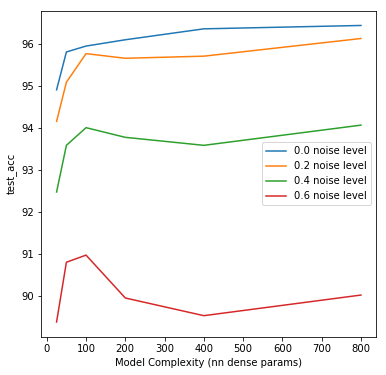

In [84]:
# Trial_id corresponds to running the model params 5 times
# Attribute id corresponds to our "i_to_word" dict
plot_trial(overall_metrics, i_to_word, attribute_id=4, trial_id=0)

[0.052552, 0.042214, 0.038271, 0.036749, 0.036669, 0.036646]
[0.34261, 0.33132, 0.3214, 0.32284, 0.31431, 0.30893]
[0.56889, 0.5504, 0.53439, 0.52097, 0.50451, 0.49987]
[0.7339, 0.71303, 0.70024, 0.67642, 0.66155, 0.64845]


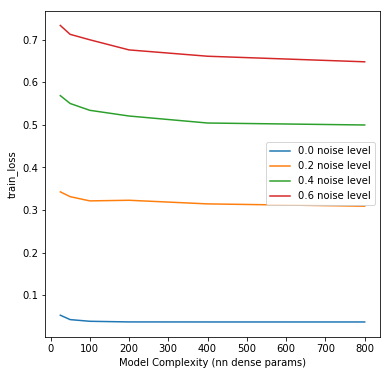

In [87]:
plot_trial(overall_metrics, i_to_word, attribute_id=1, trial_id=0)

[98.017, 98.742, 98.9, 98.933, 99.083, 99.042]
[80.683, 81.392, 81.817, 81.717, 82.075, 82.217]
[62.983, 63.558, 64.4, 65.233, 65.683, 66.017]
[45.267, 46.475, 47.467, 49.2, 50.133, 51.167]


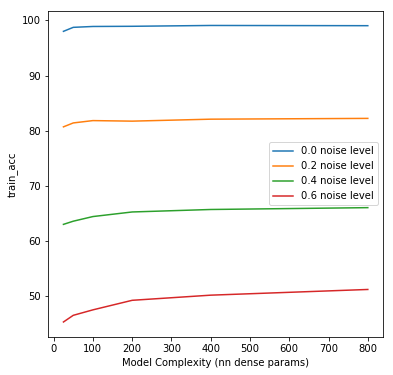

In [88]:
plot_trial(overall_metrics, i_to_word, attribute_id=2, trial_id=0)

[0.081949, 0.073199, 0.070787, 0.068956, 0.068091, 0.065426]
[0.13567, 0.12934, 0.12416, 0.12397, 0.13008, 0.12311]
[0.25629, 0.25589, 0.24974, 0.24756, 0.25121, 0.24781]
[0.43265, 0.4202, 0.41342, 0.41441, 0.41945, 0.41776]


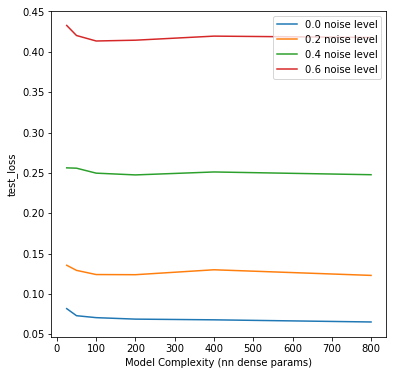

In [89]:
plot_trial(overall_metrics, i_to_word, attribute_id=3, trial_id=0)

[0.081949, 0.073199, 0.070787, 0.068956, 0.068091, 0.065426]
[0.13567, 0.12934, 0.12416, 0.12397, 0.13008, 0.12311]
[0.25629, 0.25589, 0.24974, 0.24756, 0.25121, 0.24781]
[0.43265, 0.4202, 0.41342, 0.41441, 0.41945, 0.41776]


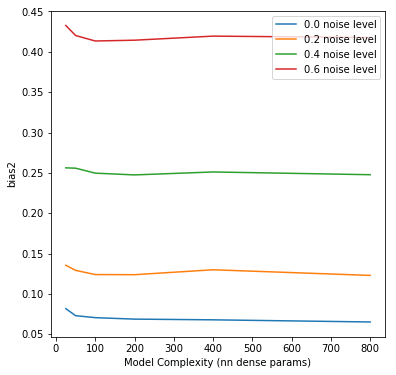

In [90]:
plot_trial(overall_metrics, i_to_word, attribute_id=5, trial_id=0)